#**Regressão Linear com: statsmodels**
https://www.statsmodels.org/stable/gettingstarted.html

Este estudo de caso projetado para colocá-lo em funcionamento rapidamente com o statsmodels. 

A partir de dados brutos, mostraremos os passos necessários para estimar um modelo estatístico e traçar um gráfico de diagnóstico. Usaremos apenas funções fornecidas por ou statsmodels e suas dependências:

*   pandas
*   patsy



In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import pandas as pd

In [ ]:
from patsy import dmatrices

In [ ]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data
df.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [ ]:
vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']

In [ ]:
df_vars = df[vars]

In [ ]:
df_vars.tail()

,Department,Lottery,Literacy,Wealth,Region
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C
85,Corse,83,49,37,NaN


In [ ]:
df_vars = df_vars.dropna()
df_vars.tail()

,Department,Lottery,Literacy,Wealth,Region
80,Vendee,68,28,56,W
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C


# **Motivação e modelo substantivos¶**

Queremos saber se as taxas de alfabetização nos 86 departamentos franceses estão associadas às apostas per capita na Loteria Real na década de 1820. Precisamos controlar o nível de riqueza em cada departamento e também queremos incluir uma série de variáveis ​​dummy no lado direito de nossa equação de regressão para controlar a heterogeneidade não observada devido a efeitos regionais. O modelo é estimado usando a regressão dos mínimos quadrados ordinários (OLS).

## **Matrizes de design ( endog e exog )¶**

Para se adequar à maioria dos modelos cobertos por statsmodels, você precisará criar duas matrizes de projeto:
* A primeira é uma matriz de variáveis ​​endógenas (ou seja, dependentes, resposta, regressando, etc.).
* A segunda é uma matriz de variáveis ​​exógenas (ou seja, independentes, preditoras, regressoras, etc.). As estimativas do coeficiente OLS (**Ordinary Least Squares** - Mínimos Quadrados Comum) são calculadas como de costume: Regressão Linear por Mínimos Quadrados Ordinários.

Onde y é uma coluna N x 1 de dados sobre apostas de loteria per capita (Loterry). X é uma coluna N x 7 com um intercepto, as variáveis Literacy e Wealth, e 4 variáveis ​​binárias de região.

O patsy módulo fornece uma função conveniente para preparar matrizes de projeto usando R fórmulas semelhantes.


In [ ]:
#Usamos a função patsy's dmatricespara criar matrizes de design:
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=df_vars, return_type='dataframe')

Observe que “~” separa o lado esquerdo do modelo do lado direito, e que “+” adiciona novas colunas à matriz de projeto.
* Fórmula:  *'variável dependente ~ lista de variáveis ​​independentes separadas pelo símbolo +..'*. Em termos simples, a variável dependente é o fator que você está tentando prever e, do outro lado da fórmula são as variáveis ​​que estão sendo usadas para realizar a "previsão". 

In [ ]:
#As matrizes/quadros de dados resultantes são assim:
y[:3]

,Lottery
0,41.0
1,38.0
2,66.0


In [ ]:
X.head()

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0
3,1.0,1.0,0.0,0.0,0.0,46.0,76.0
4,1.0,1.0,0.0,0.0,0.0,69.0,83.0


In [ ]:
# Criando o modelo
mod = sm.OLS(y, X)

In [ ]:
# usando o modelo para criar uma linha de melhor ajuste - Regressão Linear
res = mod.fit()

In [ ]:
# Imprimindo o resumo
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           1.07e-05
Time:                        16:54:14   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

## **Lendo os Resultados: OLS Regression Results**
* Dep. Variable: variável dependente "Lottery"
* Modelo: OLS - Mínimos Quadrados Ordinários
* Date / Time: Data e Hora em que criamos o modelo
* No. Observations: número de observações no conjunto de dados
* Df Residuals: outra notação para Graus de Liberdade no modelo.  É calculado na forma de 'nk-1' ou 'número de observações-número de variáveis ​​de previsão-1'.
*  Df Model: numera as variáveis de previsão
* Covariance Type: é uma medida que explica como duas variáveis estão ligadas de forma positiva ou negativa. (covariância robusta é aquela calculada de forma a minimizar ou eliminar variáveis)
* R-squared: é a medida de quanto da variável independente é explicada por mudanças em nossas variáveis ​​dependentes. Em termos percentuais, 0,338 significaria que nosso modelo explica 33,8% da mudança em nossa variável 'Lottery'.
* Adj. R-squared: analisa a eficácia de multiplas variáveis, dependendo do modelo.
* F-statistic: é um valor obtido quando você executa a análise de regressão para descobrir se as médias entre duas populações são significativamente diferentes. (https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/)
* Prob (F-Statistic): refere-se a precisão da hipótese nula, ou se é preciso que o efeito de suas variáveis ​​seja 0. Neste caso, está nos dizendo 0,00107% de chance disso.
* Log-Likelihood: é probabilidade de que seu modelo tenha produzido os dados fornecidos. Ele é usado para comparar valores de coeficiente para cada variável no processo de criação do modelo.
* AIC / BIC: são usados ​​para comparar a eficácia de modelos no processo de regressão linear, usando um sistema de penalidade para medir múltiplas variáveis. Esses números são usados ​​para a seleção de recursos de variáveis.
* O Intercept é o resultado do nosso modelo se todas as variáveis ​​fossem ajustadas para 0. Na clássica fórmula linear 'y = mx+b', é nosso b, uma constante adicionada para explicar um valor inicial para nossa linha.
* Abaixo da interceptação estão nossas variáveis. Lembra da nossa fórmula? 'Literacy + Wealth + Region'. Aqui vemos nossas variáveis ​​dependentes representadas. Mas por que existem quatro versões diferentes de Region quando inserimos apenas uma? Simplificando, a fórmula espera valores contínuos na forma de números. Ao inserir a região com pontos de dados como strings, a fórmula separa cada string em categorias e analisa a categoria separadamente. Formatar seus dados com antecedência pode ajudá-lo a organizar e analisar isso corretamente.
* coef: é o valor da interceptação. Para cada variável, é a medida de como a mudança nessa variável afeta a variável independente. É o 'm' em 'y = mx + b' Uma unidade de mudança na variável dependente afetará o valor de mudança do coeficiente da variável na variável independente. Se o coeficiente for negativo, eles têm uma relação inversa. À medida que um sobe, o outro desce.
* std err: é uma estimativa do desvio padrão do coeficiente, uma medida da quantidade de variação no coeficiente ao longo de seus pontos de dados. O t está relacionado e é uma medida da precisão com que o coeficiente foi medido. Um erro std baixo comparado a um coeficiente alto produz uma estatística t alta, o que denota uma significância alta para o seu coeficiente.
* P>|t|: é uma das estatísticas mais importantes no resumo. Ele usa a estatística t para produzir o valor p , uma medida da probabilidade de seu coeficiente ser medido por acaso por meio de nosso modelo. O valor p de 0,378 para "Wealth" está dizendo que há 37,8% de chance de a variável "Wealth" não afetar a variável dependente, "Lottery", e nossos resultados são produzidos por acaso. A análise adequada do modelo irá comparar o valor p com um valor alfa previamente estabelecido, ou um limite com o qual podemos aplicar significância ao nosso coeficiente. Um alfa comum é 0,05, que poucas de nossas variáveis ​​passam nesta instância.
* [0,025 e 0,975]: são ambas medidas de valores de nossos coeficientes dentro de 95% de nossos dados, ou dentro de dois desvios padrão. Fora desses valores geralmente podem ser considerados valores discrepantes.
*Omnibus: descreve a normalidade da distribuição de nossos resíduos usando skew e curtose como medidas. Um 0 indicaria normalidade perfeita.
* Prob(Omnibus): é um teste estatístico que mede a probabilidade de os resíduos serem normalmente distribuídos. Um 1 indicaria distribuição perfeitamente normal. 
* Skew é uma medida de simetria em nossos dados, sendo 0 simetria perfeita. A curtose mede o pico de nossos dados, ou sua concentração em torno de 0 em uma curva normal. 
* Kurtosis: mais alta implica menos outliers.
* Durbin-Watson é uma medida de homocedasticidade, ou uma distribuição uniforme de erros ao longo de nossos dados. A heterocedasticidade implicaria uma distribuição desigual, por exemplo, à medida que o ponto de dados aumenta, o erro relativo aumenta. A homocedasticidade ideal ficará entre 1 e 2. 
* Jarque-Bera (JB) e Prob(JB): são métodos alternativos de medir o mesmo valor que Omnibus e Prob(Omnibus) usando assimetria e curtose. Usamos esses valores para confirmar um ao outro.
* Cond. No.: é uma medida da sensibilidade do nosso modelo em comparação com o tamanho das mudanças nos dados que está analisando.


**Referências do resumo supracitado**:
* https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a#:~:text=OLS%20is%20a%20common%20technique,the%20amount%20of%20error%20produced.
* https://www.statsmodels.org/stable/example_formulas.html

## Variáveis Categóricas:
https://www.statsmodels.org/stable/example_formulas.html

Observando o resumo impresso acima, observe que patsy determinou que os elementos de Region eram strings de texto, então tratou Region como uma variável categórica. o padrão de patsy também é incluir uma interceptação, então automaticamente descartamos uma das categorias de região.

Se Region fosse uma variável inteira e quezéssemos tratar explicitamente como categórica, poderíamos ter feito isso usando o operador C():

In [ ]:
import statsmodels.formula.api as smf
res=smf.ols(formula='Lottery ~ Literacy + Wealth + C(Region)', data=df_vars).fit()
print(res.params)

Intercept         38.651655
C(Region)[T.E]   -15.427785
C(Region)[T.N]   -10.016961
C(Region)[T.S]    -4.548257
C(Region)[T.W]   -10.091276
Literacy          -0.185819
Wealth             0.451475
dtype: float64


In [ ]:
dir(res)

# **Testes de diagnóstico e especificação**

statsmodels permite que você conduza uma série de diagnósticos de regressão úteis e testes de especificação.

Por exemplo, aplique o teste Rainbow para linearidade (a hipótese nula é que a relação está devidamente modelada como linear):

In [ ]:
sm.stats.linear_rainbow(res)

(0.847233997615691, 0.6997965543621644)

In [ ]:
print(sm.stats.linear_rainbow.__doc__)

Rainbow test for linearity

    The Null hypothesis is that the regression is correctly modelled as linear.
    The alternative for which the power might be large are convex, check

    Parameters
    ----------
    res : Result instance

    Returns
    -------
    fstat : float
        test statistic based of F test
    pvalue : float
        pvalue of the test

    


In [ ]:
print(res.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.287   
Dependent Variable: Lottery          AIC:                764.5986
Date:               2022-04-13 18:01 BIC:                781.6971
No. Observations:   85               Log-Likelihood:     -375.30 
Df Model:           6                F-statistic:        6.636   
Df Residuals:       78               Prob (F-statistic): 1.07e-05
R-squared:          0.338            Scale:              436.43  
-----------------------------------------------------------------
                 Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
-----------------------------------------------------------------
Intercept        38.6517   9.4563  4.0874 0.0001  19.8255 57.4778
Region[T.E]     -15.4278   9.7273 -1.5860 0.1168 -34.7934  3.9378
Region[T.N]     -10.0170   9.2603 -1.0817 0.2827 -28.4528  8.4188
Region[T.S]      -4.5483   7.2789 -0.6249 0.5339 -19.0394  9.9429
Region[T.W]     -10.0913   

statsmodels também fornece funções gráficas.

Por exemplo, podemos desenhar um gráfico de regressão parcial para um conjunto de regressores por:

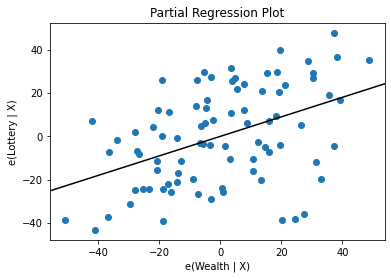

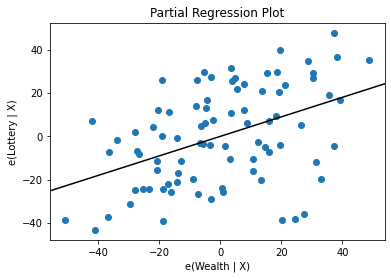

In [ ]:
sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region', 'Literacy'], data=df_vars, obs_labels=False)

# Pratique com os seguintes exemplos:
https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html